In [1]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


# EDA

In [2]:
import pandas as pd
import numpy as np

# I will now read in the csv
# https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
df = pd.read_csv("AB_NYC_2019.csv")

# This function will check to make sure that it was read in correctly
print(df.shape)
df.head()

(48895, 16)


id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [3]:
# Columns 'to_list()'
df.columns.to_list()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [4]:
# This will rearrange the columns
df = df[["id",
        "name",
        "host_id",
        "host_name",
        "neighbourhood_group",
        "neighbourhood",
        "latitude",
        "longitude",
        "room_type",
        "minimum_nights",
        "number_of_reviews",
        "last_review",
        "reviews_per_month",
        "calculated_host_listings_count",
        "availability_365",
        "price"]]

# This will check to make sure that they were done correctly
print(df.shape)
df.head()

(48895, 16)


id  ... price
0  2539  ...   149
1  2595  ...   225
2  3647  ...   150
3  3831  ...    89
4  5022  ...    80

[5 rows x 16 columns]

In [5]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [6]:
# Dropping Columns
df.drop(columns=["host_name", "last_review", "reviews_per_month"], inplace = True)

# CHECK:
print(df.shape)
df.head()

(48895, 13)


id  ... price
0  2539  ...   149
1  2595  ...   225
2  3647  ...   150
3  3831  ...    89
4  5022  ...    80

[5 rows x 13 columns]

In [7]:
# Defining Function -- ** nunique() **
def data_distributions(df):

  # predifined columns
  cols = ["host_id",
          "neighbourhood_group",
          "neighbourhood",
          "room_type",
          "minimum_nights",
          "number_of_reviews",
          "calculated_host_listings_count",
          "availability_365"]

  # For loop for specified columns
  for col in cols:
    print(col + ":", df[col].nunique())
    print("\n")
    print(df[col].value_counts(normalize=True))
    print("-----\n")


# Now we need to call the function on the df
data_distributions(df)

host_id: 37457


219517861    0.006688
107434423    0.004745
30283594     0.002475
137358866    0.002107
12243051     0.001963
               ...   
1641589      0.000020
4070519      0.000020
208106618    0.000020
235939247    0.000020
1288080      0.000020
Name: host_id, Length: 37457, dtype: float64
-----

neighbourhood_group: 5


Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64
-----

neighbourhood: 221


Williamsburg          0.080172
Bedford-Stuyvesant    0.075959
Harlem                0.054361
Bushwick              0.050414
Upper West Side       0.040311
                        ...   
Rossville             0.000020
Fort Wadsworth        0.000020
New Dorp              0.000020
Richmondtown          0.000020
Willowbrook           0.000020
Name: neighbourhood, Length: 221, dtype: float64
-----

room_type: 3


Entire home/apt    0.519665
Private room       0.456

In [8]:
# Defining Function -- ** value_counts() **
def values_function(df):
  # Predefined column 
  cols = ["host_id",
          "neighbourhood_group",
          "neighbourhood",
          "room_type",
          "minimum_nights",
          "number_of_reviews",
          "calculated_host_listings_count",
          "availability_365"]
  
  for c in cols:
    print("---- %s ---" % c)
    print(df[c].value_counts())
    print("\n")


# Calling the Function
values_function(df)

---- host_id ---
219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64


---- neighbourhood_group ---
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


---- neighbourhood ---
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Rossville                1
Fort Wadsworth           1
New Dorp                 1
Richmondtown             1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64


---- room_type ---
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


---- minimum_nights ---
1       12720
2       11696
3        7999
30  

In [9]:
# Now I need to check for any NaN's
df.isnull().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
price                              0
dtype: int64

In [10]:
# Next will be to describe the metrics
df.describe()

id       host_id  ...  availability_365         price
count  4.889500e+04  4.889500e+04  ...      48895.000000  48895.000000
mean   1.901714e+07  6.762001e+07  ...        112.781327    152.720687
std    1.098311e+07  7.861097e+07  ...        131.622289    240.154170
min    2.539000e+03  2.438000e+03  ...          0.000000      0.000000
25%    9.471945e+06  7.822033e+06  ...          0.000000     69.000000
50%    1.967728e+07  3.079382e+07  ...         45.000000    106.000000
75%    2.915218e+07  1.074344e+08  ...        227.000000    175.000000
max    3.648724e+07  2.743213e+08  ...        365.000000  10000.000000

[8 rows x 9 columns]

In [12]:
import pandas.util.testing as tm
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors 
%matplotlib inline

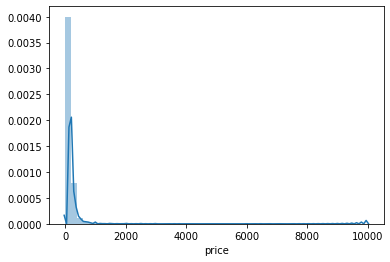

In [13]:
# This function will print out a DistPlot -- Price
# You can see that it is totally skewed so we are going to need to do a log
# transformation.
sns.distplot(df["price"], bins=50);

In [14]:
# Log Transform Prices -- (since the data is really skewed)
df["log_price"] = np.log(df["price"].values)

# CHECK:
print(df.shape)
df.head()

(48895, 14)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


id                                              name  ...  price log_price
0  2539                Clean & quiet apt home by the park  ...    149  5.003946
1  2595                             Skylit Midtown Castle  ...    225  5.416100
2  3647               THE VILLAGE OF HARLEM....NEW YORK !  ...    150  5.010635
3  3831                   Cozy Entire Floor of Brownstone  ...     89  4.488636
4  5022  Entire Apt: Spacious Studio/Loft by central park  ...     80  4.382027

[5 rows x 14 columns]

In [15]:
# Exactly how many rows are zero's? (Since we were getting them when I log transformed)

# df_zero = df[df["price"] == 0]

# This will check the function
# print(df_zero.shape) 
# df_zero.head

In [33]:
## Shrinking DF

# Removing -- Custom Outliers
dfx = df[(df["price"] > 0) & 
         (df["price"] < 1000)]

# Removing -- Above 2000
# dfx = df[df['price'] <= 2000]

# Not Removing Anything
dfx = df

# CHECK:
print(df.shape)
df.head()

(48586, 14)


id                                              name  ...  price log_price
0  2539                Clean & quiet apt home by the park  ...    149  5.003946
1  2595                             Skylit Midtown Castle  ...    225  5.416100
2  3647               THE VILLAGE OF HARLEM....NEW YORK !  ...    150  5.010635
3  3831                   Cozy Entire Floor of Brownstone  ...     89  4.488636
4  5022  Entire Apt: Spacious Studio/Loft by central park  ...     80  4.382027

[5 rows x 14 columns]

In [34]:
# DistPlot -- 'log_price' on shrunken DF
# CHECK: Normalized Data
sns.distplot(df["log_price"], bins=50);

In [35]:
# Let's try a Pair Plot
sns.pairplot(df);

In [36]:
import plotly.express as px

In [37]:
# Geographic Location of AirBnB's
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="price",
                        hover_data=["neighbourhood_group",	"neighbourhood", "id"],
                        color_discrete_sequence=["fuchsia"], 
                        zoom=10, height=125)

# Location Graph
fig.update_layout(mapbox_style="open-street-map")

# Layout Features
fig.update_layout(width=1000, 
                  height=1000, 
                  margin={"r":1,"t":1,"l":1,"b":1})

# Show Graphic
fig.show();

In [21]:
# Plotly Graph to HTML
fig.write_html("airbnb_NYC_locations.html")

In [22]:
# Name Column -- CHECK
dfx["name"][:10]

0                  Clean & quiet apt home by the park
1                               Skylit Midtown Castle
2                 THE VILLAGE OF HARLEM....NEW YORK !
3                     Cozy Entire Floor of Brownstone
4    Entire Apt: Spacious Studio/Loft by central park
5           Large Cozy 1 BR Apartment In Midtown East
6                                     BlissArtsSpace!
7                    Large Furnished Room Near B'way 
8                  Cozy Clean Guest Room - Family Apt
9                  Cute & Cozy Lower East Side 1 bdrm
Name: name, dtype: object

## Modeling

#### PreProcessing

In [23]:
# I need to install category encoders
!pip install category_encoders

     |████████████████████████████████| 81kB 2.5MB/s 


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import category_encoders as ce 

import warnings
warnings.filterwarnings("ignore")

# This will use a defining function
def preprocessing(df):
  """
  Precprocesses the data.

  Input: DataFrame

  Output: X_train, X_test, y_train, y_test
  """

  # Copy the DF
  dfx = df.copy()

  # Targets and Features
  target = "log_price"
  features = ["neighbourhood_group",
              "neighbourhood",
              "latitude",
              "longitude",
              "room_type",
              "minimum_nights",
              "number_of_reviews",
              "calculated_host_listings_count",
              "availability_365"]

  # This will create the X Features Matrix
  X = dfx[features]

  # This will create the y target vector
  y = dfx[target]

  # This function will map - 'room_type'
  room_type_dict = {"Shared room":1, "Private room":2, "Entire home/apt":3}
  X.iloc[:, 4].map(room_type_dict)
  # print(X["room_type"])

  # Now we will create the Train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=42)

  # Preprocess Pipline -- OrdinalEncoder and StandardScaler
  preprocess = make_pipeline(
      ce.OrdinalEncoder(),
      StandardScaler()
  )

  # Now we will Fit Transform and Transform Training and Testing Data
  X_train = preprocess.fit_transform(X_train)
  X_test = preprocess.fit_transform(X_test)

  # I now need to create a DataFrame for X Matrices
  X_train_df = pd.DataFrame(X_train, columns=features)
  X_test_df = pd.DataFrame(X_test, columns=features)
  print(X_train_df.shape,
        X_test_df.shape,
        X_train.shape,
        X_test.shape,
        y_train.shape,
        y_test.shape)

  # Return
  return X_train_df, X_test_df, X_train, X_test, y_train, y_test

# Calling function
X_train_df, X_test_df, X_train, X_test, y_train, y_test = preprocessing(dfx)

# Check it out
X_train_df.head()

(38868, 9) (9718, 9) (38868, 9) (9718, 9) (38868,) (9718,)


neighbourhood_group  ...  availability_365
0            -0.931870  ...         -0.855962
1            -0.931870  ...          1.824087
2             0.245478  ...         -0.855962
3             0.245478  ...          1.603287
4            -0.931870  ...          1.214985

[5 rows x 9 columns]

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Instantiate Model
lin_reg = LinearRegression()

# Fitting the Model to the training data
lin_reg.fit(X_train_df, y_train)

# Predicting the Training Price based on Training Data
y_pred_train = lin_reg.predict(X_train_df)
y_pred_test = lin_reg.predict(X_test_df)

# Reporting Metrics Function
def reporting_metrics(y_vector, y_pred_vector):
  mse = mean_squared_error(y_vector, y_pred_vector)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_vector, y_pred_vector)
  r2 = r2_score(y_vector, y_pred_vector)
  print("DATA METRICS \n")

  print("Mean Absolute Error:", mae)
  print("Mean Squared Error:", mse)
  print("Root Mean Squared Error:", rmse)
  print("R^2:", r2)

  print(".....")


# Calling Function -- ** TRAINING DATA **
reporting_metrics(y_train, y_pred_train)

# Intercept
print("Intercept:", lin_reg.intercept_)
print("\n")

# Coefficients
coefs = pd.Series(lin_reg.coef_, X_train_df.columns)
print("Coefficients:")
print(coefs)

DATA METRICS 

Mean Absolute Error: 0.3934541055086755
Mean Squared Error: 0.2936914830277838
Root Mean Squared Error: 0.5419330982951529
R^2: 0.33389176945764454
.....
Intercept: 4.7119444800814225


Coefficients:
neighbourhood_group              -0.005229
neighbourhood                    -0.016190
latitude                          0.073969
longitude                        -0.181662
room_type                         0.291817
minimum_nights                   -0.036028
number_of_reviews                -0.019168
calculated_host_listings_count    0.030909
availability_365                  0.075484
dtype: float64


In [26]:
# Calling Function -- ** TESTING DATA **
reporting_metrics(y_test, y_pred_test)

# Intercept
print("Intercept:", lin_reg.intercept_)
print("\n")

# Coefficients
coefs = pd.Series(lin_reg.coef_, X_test_df.columns)
print("Coefficients:")
print(coefs)

DATA METRICS 

Mean Absolute Error: 0.3980064749475836
Mean Squared Error: 0.3028740583936813
Root Mean Squared Error: 0.5503399480263824
R^2: 0.31736604459801354
.....
Intercept: 4.7119444800814225


Coefficients:
neighbourhood_group              -0.005229
neighbourhood                    -0.016190
latitude                          0.073969
longitude                        -0.181662
room_type                         0.291817
minimum_nights                   -0.036028
number_of_reviews                -0.019168
calculated_host_listings_count    0.030909
availability_365                  0.075484
dtype: float64


## Random Forest Regressor

In [27]:

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Instantiate Model
rf_reg = RandomForestRegressor()

# Fitting the Model to the training data
rf_reg.fit(X_train_df, y_train)

# Predicting
y_pred_train = rf_reg.predict(X_train_df)
y_pred_test = rf_reg.predict(X_test_df)

# Reporting Metrics -- TRAINING DATA
reporting_metrics(y_train, y_pred_train)

# Get Feature Importances
importances = pd.Series(rf_reg.feature_importances_, X_train_df.columns)

# Plot Top N Features Importances
n = 10
plt.figure(figsize = (10, n/2))
plt.title(f"Top {n} Most Important Training Features")
importances.sort_values()[-n:].plot.barh(color = "green");

DATA METRICS 

Mean Absolute Error: 0.11158335263578274
Mean Squared Error: 0.022974119014701345
Root Mean Squared Error: 0.15157215778203248
R^2: 0.9478934506122383
.....


In [28]:
# I will attempt to save the model creating a pickled file

import pickle

saved_model = pickle.dumps(rf_reg)

rf_reg_from_pickle = pickle.loads(saved_model)

rf_reg_from_pickle.predict(X_test_df)

array([4.08419018, 4.14696259, 5.91495733, ..., 5.71440395, 5.61047711,
       4.4943946 ])

In [41]:
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(rf_reg, 'rf_reg.pkl')

# Load the model from the file
rf_reg_from_joblib = joblib.load('rf_reg.pkl')

# Use the loaded model to make predictions
rf_reg_from_joblib.predict(X_test_df)

array([4.08419018, 4.14696259, 5.91495733, ..., 5.71440395, 5.61047711,
       4.4943946 ])

In [38]:
# Reporting Metrics -- TESTING DATA
reporting_metrics(y_test, y_pred_test)

# Get Feature Importances
importances = pd.Series(rf_reg.feature_importances_, X_test_df.columns)

# Plot Top N Features Importances
n = 10
plt.figure(figsize = (10, n/2))
plt.title(f"Top {n} Most Important Testing Features")
importances.sort_values()[-n:].plot.barh(color = "red");

DATA METRICS 

Mean Absolute Error: 0.31164264474123704
Mean Squared Error: 0.17761797200756396
Root Mean Squared Error: 0.42144747241805114
R^2: 0.59967499552437
.....


## We got the best scores and minimized errors most efficiently with the Random Forest Regressor, so we decided that it would be the best model to use for the prediction app.

### Neural Network

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from tensorflow.keras.optimizers import Adam, Nadam, Adadelta, Adagrad
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [42]:
# Defining Function  -- 'create_model'
def create_model(layers=2, nodes=32, activation_type="relu", dropout=True):
     
    '''
    Creates a model instance with the specified attributes
    '''
    # Instantiate Model
    model = Sequential()
    
    # Input Layer
    model.add(Dense(9, input_dim=9, activation=activation_type))
    
    # Hidden Layers
    for i in range(layers):
      model.add(Dense(nodes, activation=activation_type))
      if dropout == True:
        model.add(Dropout(0.2))
    
    # Output Layer
    model.add(Dense(1))
    
    # Compile model
    model.compile(loss=["mae", "mse"],
                  optimizer="adam",
                  metrics=["mae", "mse", "accuracy"])
    
    return model

# Creating Regressor Model
model = KerasRegressor(build_fn=create_model, verbose=0)

# Parameters
param_grid = {"layers": [0, 1, 2, 3, 4, 5],
              "nodes": [8, 16, 32, 64, 128, 256],
              "batch_size": [8, 16, 32],
              "activation_type": ["relu","sigmoid","selu"]}

# RandomizedSearchCV
search = RandomizedSearchCV(estimator=model,
                            param_distributions=param_grid,
                            n_jobs=-1,
                            cv=5)

# Search Results
search_result = search.fit(X_train, y_train)

# Report Results
def nn_reporting(search_results):
  print(f'Best {search_results.best_score_} using {search_results.best_params_}')
  means = search_results.cv_results_["mean_test_score"]
  stds = search_results.cv_results_["std_test_score"]
  params = search_results.cv_results_["params"]
  for mean, stdev, param in zip(means, stds, params):
    print(f"Mean :{mean}, Stdev:{stds}, with:{param}")

# Calling Function
nn_reporting(search_result)

Best -0.3606884241104126 using {'nodes': 256, 'layers': 5, 'batch_size': 16, 'activation_type': 'relu'}
Mean :-0.3894609987735748, Stdev:[0.01213298 0.0140381  0.00255728 0.00883535 0.01477842 0.05220969
 0.01079688 0.01089532 0.01266573 0.0167144 ], with:{'nodes': 16, 'layers': 5, 'batch_size': 8, 'activation_type': 'relu'}
Mean :-0.47351128458976743, Stdev:[0.01213298 0.0140381  0.00255728 0.00883535 0.01477842 0.05220969
 0.01079688 0.01089532 0.01266573 0.0167144 ], with:{'nodes': 64, 'layers': 0, 'batch_size': 16, 'activation_type': 'relu'}
Mean :-0.4097187280654907, Stdev:[0.01213298 0.0140381  0.00255728 0.00883535 0.01477842 0.05220969
 0.01079688 0.01089532 0.01266573 0.0167144 ], with:{'nodes': 16, 'layers': 1, 'batch_size': 32, 'activation_type': 'sigmoid'}
Mean :-0.3916938841342926, Stdev:[0.01213298 0.0140381  0.00255728 0.00883535 0.01477842 0.05220969
 0.01079688 0.01089532 0.01266573 0.0167144 ], with:{'nodes': 8, 'layers': 2, 'batch_size': 8, 'activation_type': 'selu'}

In [43]:
## NN Testing Using Above Search Parameters

# Instantiate Model
model = Sequential([
    # Input Layer
    Dense(9, activation="relu"),
    # Hidden: 1
    Dense(128, activation="relu"),
    # Hidden: 2
    Dense(64, activation="relu"),
    # Hidden: 3
    Dense(32, activation="relu"),
    # Output
    Dense(1)
])

# Compiler
model.compile(loss=["mse", "mae"],
              optimizer=Adam(lr=0.01),
              metrics=["mse", "mae"])

# History
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32)

Epoch 1/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.3464 - mse: 0.3464 - mae: 0.4047 - val_loss: 0.2125 - val_mse: 0.2125 - val_mae: 0.3546
Epoch 2/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.2108 - mse: 0.2108 - mae: 0.3479 - val_loss: 0.2161 - val_mse: 0.2161 - val_mae: 0.3398
Epoch 3/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.2014 - mse: 0.2014 - mae: 0.3399 - val_loss: 0.2154 - val_mse: 0.2154 - val_mae: 0.3616
Epoch 4/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.1981 - mse: 0.1981 - mae: 0.3358 - val_loss: 0.2194 - val_mse: 0.2194 - val_mae: 0.3650
Epoch 5/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.1955 - mse: 0.1955 - mae: 0.3337 - val_loss: 0.1898 - val_mse: 0.1898 - val_mae: 0.3223
Epoch 6/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.1928 - mse: 0.1928 - mae: 0.3317 - val_loss: 0.1897 - val_mse: 0.1897 - val_mae: 0.3304
Epoc

In [44]:
# Defining Function -- ** Nadam **
def create_model(layers=3, nodes=32, activation_type="relu", 
                 dropout=True, beta_1=0.95, beta_2=.9999, lr=0.001):
    '''
    Creates a model instance with the specified attributes
    '''
    # Instantiate Model
    model = Sequential()
    
    # Input Layer
    model.add(Dense(9, input_dim=9, activation=activation_type))
    
    # Hidden Layers
    for i in range(layers):
      model.add(Dense(nodes, activation=activation_type))
      if dropout == True:
        model.add(Dropout(0.2))
    
    # Output Layer
    model.add(Dense(1))
    
    # Compile model
    model.compile(loss=["mae", "mse"],
                  optimizer=Nadam(lr=lr,
                                  beta_1=beta_1,
                                  beta_2=beta_2),
                  metrics=["mae", "mse"])
    
    return model

# Creating Regressor Model
model = KerasRegressor(build_fn=create_model, verbose=0)

# HyperParameters and Tuning
lr = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
beta_1 = [0.80, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 0.99]
beta_2 = [0.9997, 0.9998, 0.9999, 0.999, 0.99]
param_grid = dict(
    lr=lr,
    beta_1=beta_1,
    beta_2=beta_2
)


# RandomizedSearchCV
search = RandomizedSearchCV(estimator=model,
                            param_distributions=param_grid,
                            n_jobs=-1,
                            cv=5)

# Search Results
search_result = search.fit(X_train, y_train)

# Report Results
nn_reporting(search_result)

Best -0.34701613187789915 using {'lr': 0.01, 'beta_2': 0.9999, 'beta_1': 0.95}
Mean :-0.5039582848548889, Stdev:[0.04520588 0.02812034 0.00853399 0.00202472 0.00677913 0.05929714
 0.00965101 0.04031382 0.01975068 0.02301342], with:{'lr': 0.2, 'beta_2': 0.9999, 'beta_1': 0.925}
Mean :-0.553340470790863, Stdev:[0.04520588 0.02812034 0.00853399 0.00202472 0.00677913 0.05929714
 0.00965101 0.04031382 0.01975068 0.02301342], with:{'lr': 0.4, 'beta_2': 0.99, 'beta_1': 0.875}
Mean :-0.35329033732414244, Stdev:[0.04520588 0.02812034 0.00853399 0.00202472 0.00677913 0.05929714
 0.00965101 0.04031382 0.01975068 0.02301342], with:{'lr': 0.01, 'beta_2': 0.9999, 'beta_1': 0.875}
Mean :-0.5447385311126709, Stdev:[0.04520588 0.02812034 0.00853399 0.00202472 0.00677913 0.05929714
 0.00965101 0.04031382 0.01975068 0.02301342], with:{'lr': 0.3, 'beta_2': 0.9998, 'beta_1': 0.9}
Mean :-0.34701613187789915, Stdev:[0.04520588 0.02812034 0.00853399 0.00202472 0.00677913 0.05929714
 0.00965101 0.04031382 0.01

In [45]:
## NN Testing Using Above Search Parameters

# Instantiate Model
model = Sequential([
    # Input Layer                    
    Dense(9, activation="relu"),
    # Hidden: 1
    Dense(128, activation="relu"),
    # Hidden: 2
    Dense(64, activation="relu"),
    # Hidden: 2
    Dense(32, activation="relu"),
    # Output Layer
    Dense(1)
])

# Compiler
model.compile(loss=["mse", "mae"],
              optimizer=Nadam(lr=0.01,
                              beta_1=0.9,
                              beta_2=0.99),
              metrics=["mse", "mae"])

# History
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32)

Epoch 1/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.3794 - mse: 0.3794 - mae: 0.4302 - val_loss: 0.2039 - val_mse: 0.2039 - val_mae: 0.3335
Epoch 2/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.2030 - mse: 0.2030 - mae: 0.3405 - val_loss: 0.1924 - val_mse: 0.1924 - val_mae: 0.3326
Epoch 3/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.1952 - mse: 0.1952 - mae: 0.3334 - val_loss: 0.1946 - val_mse: 0.1946 - val_mae: 0.3346
Epoch 4/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.1929 - mse: 0.1929 - mae: 0.3310 - val_loss: 0.1967 - val_mse: 0.1967 - val_mae: 0.3395
Epoch 5/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.1905 - mse: 0.1905 - mae: 0.3289 - val_loss: 0.1920 - val_mse: 0.1920 - val_mae: 0.3305
Epoch 6/50
1215/1215 [==============================] - 2s 2ms/step - loss: 0.1903 - mse: 0.1903 - mae: 0.3285 - val_loss: 0.2048 - val_mse: 0.2048 - val_mae: 0.3311
Epoc